In [2]:
import numpy as np
import matplotlib.pyplot as plt

### NetworkX 
networkx gives us many tools to work with graphs - network of nodes.

### Creating a graph
we import networkx library like this:

In [3]:
import networkx as nx

First we have to have a name for our graph.
Notice the uppercase first letter, Graph follow CapWords naming convention becasue Graph is a class in nx.
(This PEP8 holds more info on style and naming conventions)

In [3]:
G = nx.Graph()    # creates empty graph named G

#### Adding nodes and edges "manually"
Using two methods of ```Graph``` class: ```.add_node``` and ```.add_edge```.

In [4]:
# lets add two Nodes named 'a' and "b" (strings):
G.add_node('a')
G.add_node('b')

# now we can connect them with an edge:
G.add_edge('a', 'b')

#### Using one of nx generators
If the graph that you want to work with is known, have a name\
or belongs to some family of graphs for example full graphs with $n$ nodes\
then there is a chance there is a build in function that generate such a graph.

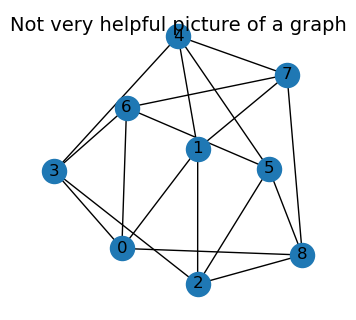

In [5]:
import matplotlib.pyplot as plt

G1 = nx.circulant_graph(9, [1,3]) 
pos = nx.spring_layout(G1, seed=111)

fig = plt.figure(figsize=(3,3)) 
fig.suptitle('Not very helpful picture of a graph', fontsize=14)
nx.draw(G1, with_labels = True, pos=pos)
plt.show()

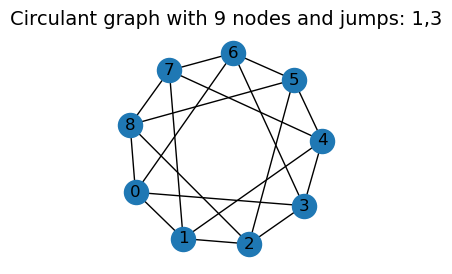

In [6]:
# lets repair, take positions of nodes 1,2,..., 9 from simple circulant_graph with a jump 1.

G1 = nx.circulant_graph(9, [1,3])
frame = nx.circulant_graph(9, [1])
pos_frame = nx.spring_layout(frame, seed=11) 

fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Circulant graph with 9 nodes and jumps: 1,3", fontsize=14)
nx.draw(G1, with_labels = True, pos=pos_frame)

In [7]:
# G1.edges
pos_frame

{0: array([-0.90921561, -0.41255639]),
 1: array([-0.42202251, -0.86300768]),
 2: array([ 0.25093929, -0.91526218]),
 3: array([ 0.81062246, -0.54299506]),
 4: array([1.        , 0.09026365]),
 5: array([0.70669435, 0.68333206]),
 6: array([0.09104766, 0.94274089]),
 7: array([-0.56369589,  0.77358702]),
 8: array([-0.96436976,  0.24389769])}

### Viewing a graph
nx have few ways to view the Graph data: ```nodes```, ```edges```, ```adj``` and ```degree```

In [8]:
print(f"nodes  = {G.nodes}")
print(f"edges  = {G.edges}")
print(f"adj    = {G.adj}")
print(f"degree = {G.degree}")

nodes  = ['a', 'b']
edges  = [('a', 'b')]
adj    = {'a': {'b': {}}, 'b': {'a': {}}}
degree = [('a', 1), ('b', 1)]


### Graph form array
Lets say that we have a flock saved as a matrix of positions and velocities\
and we have our nearest positions and distances maricies from for example KDTree fucntion.\
Lets calculate algebraic connectivity of our birds and their influences.

In [4]:
connections = np.array([[0, 2, 3],
                        [1, 4, 5],
                        [2, 0, 3],
                        [3, 0, 2],
                        [4, 5, 1],
                        [5, 4, 1]], dtype="int64")

Edges look like this: EdgeView([(0, 8), (0, 1), (0, 6) ...])\
thus we need n nodes and from row in connections ```[0, 2, 3]``` make ```[(0,2), (0,3)]```\
OR\
produce an adjacency matrix from the above. Lets try the second approach:

In [5]:
def graph_from_neighbor_index(arr):
    """ Returns a graph build from indecies output of KDTree.query.
        Parameters: array np.array with arr[i][0] = i and then indecies of neighbors """
    n = len(arr)
    res = np.zeros((n,n))
    np.put_along_axis(res, arr[:,1:], 1, axis=1)
    return nx.from_numpy_array(res)

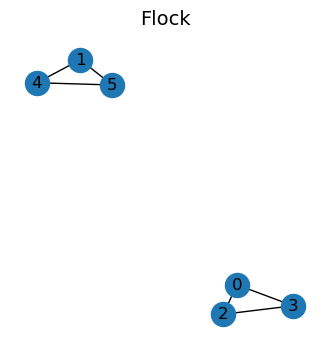

In [6]:
neigh = graph_from_neighbor_index(connections)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title(f"Flock", fontsize=14)
nx.draw(neigh, with_labels = True)
plt.show()

### nx.Graph of birds with closest connections as edges
Put the nodes of the graph in the positions of the flock.\
if one ivestigate how pow argument looks like one obtains:
```python 
{0: array([-0.90921561, -0.41255639]),
 1: array([-0.42202251, -0.86300768]),
 2: array([ 0.25093929, -0.91526218]),
 3: array([ 0.81062246, -0.54299506]),
 4: array([1.        , 0.09026365]),
 5: array([0.70669435, 0.68333206]),
 6: array([0.09104766, 0.94274089]),
 7: array([-0.56369589,  0.77358702]),
 8: array([-0.96436976,  0.24389769])}
```
Note: it is a dictionary.

In [7]:
""" Creating birds data."""
import numpy as np
from numpy.random import default_rng, SeedSequence

### initial condition functions ###
def set_random_y0(N, seed, low=0, high=1, velo_st_dev=4):
    """Produces an initial CS_matrix"""
    rng = default_rng(SeedSequence(seed))
    
    x_s = rng.uniform(low=low, high=high, size=N) # x coordinates of intial position
    y_s = rng.uniform(low=low, high=high, size=N) # y coordinates of intial position

    vx_s = velo_st_dev*rng.standard_normal(N) # x coordinates of intial velocity
    vy_s = velo_st_dev*rng.standard_normal(N) # y coordinates of intial velocity

    y_0 = np.c_[x_s, y_s, vx_s, vy_s] #returns a CS_matrix - initial condition
    return y_0

Produce the connection array (2-closest) save it under ```conn_2``` variable:

In [16]:
from scipy.spatial import KDTree

y0 = set_random_y0(77,123456)
num_neigh = 3

tree = KDTree(y0[:,:2])
conn_2 = tree.query(y0[:,:2], k=1+num_neigh)[1]
# print(tree.query(y0[:,:2], k=3))

Now lets create dictionary of positionf from ```y0```.\
Simmilarly to list comprehension there is dictionary comprehension :

In [13]:
pos_2 = {i: pt for i,pt in enumerate(y0[:,:2])}
# pos_2

Now set the parameter pos to ```pos_2```\
and we have our birds with labels, connected how KDtree tells.

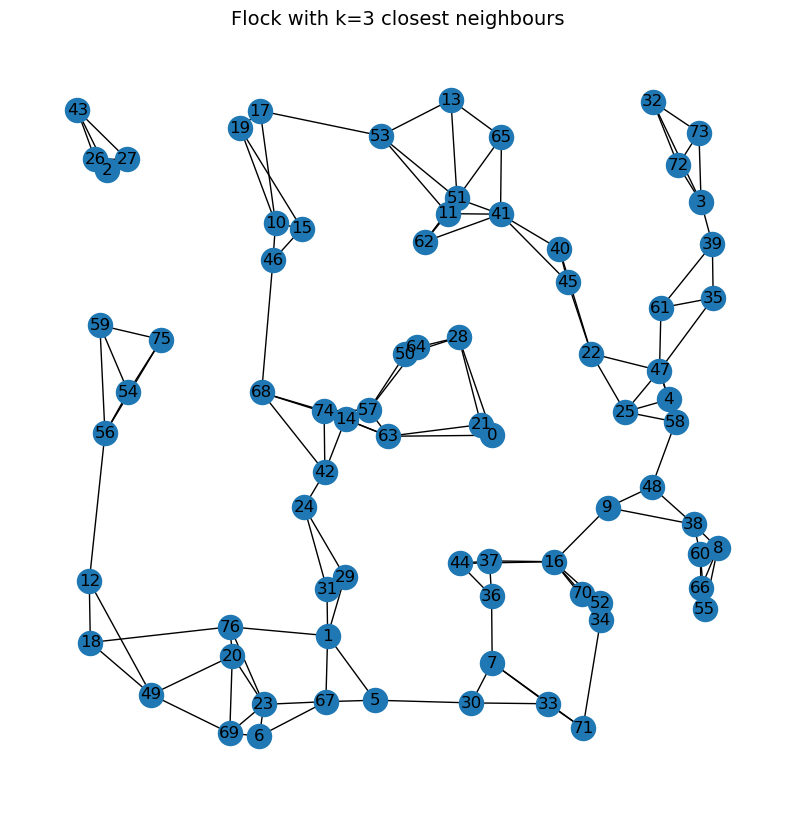

In [14]:
neigh_2 = graph_from_neighbor_index(conn_2)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title(f"Flock with k={num_neigh} closest neighbours", fontsize=14)
nx.draw(neigh_2, with_labels = True, pos=pos_2)
plt.show()

### Data handling, application structure XD
Lets separate the data and functions so that working will be easier.\
Observe that: 
1) number of birds
2) number of neighbours to follow 
3) seed

do not change during the calculation. Moreover the model (so far) is determined by those 3 parameters.\
Lets use data structure that fits this situation (its dataclass).\
You can think that those 3 numbers is our "client" and our goal is to compute something for the client,\
Becasue our project is growing (as one does) we want stucture such that it will be easy to adapt and change.\
We can try to split our work so far into functions and warp them, so instead of evaluating cells one by one we link
objects and functions in a stucture.

In [16]:
from dataclasses import dataclass

@dataclass
class SetupConditions:
    n: int
    q: int
    seed: int
    
    # ussually a class needs an __init__ method but here it is created automatically

We can quickly setup constants and have clear access to them.\
Imagine working with two setups and naming constants n1, n2, q1, q2 and so on... terrible.\
Now we can work with many setups:

In [17]:
setup_list = [SetupConditions(n=12, q=3, seed=1234+i) for i in range(10)]

Now instead of ```n0, n1, n2, ...```  for the same result we use a little longer command:\
```setup_list[0].n, setup_list[1].n, setup_list[2].n, ...```\
but it is easier to automate our data generation and handling.\
For example listing seeds is\
```[setup_list[i].seed for i in range(10)]```

#### to create many initial conditions:

##### you can do this:

In [18]:
 def init_cond(setup: SetupConditions):
    def set_random_y0(N, seed, low=0, high=1, velo_st_dev=4):
        """Produces an initial CS_matrix"""
        rng = default_rng(SeedSequence(seed))

        x_s = rng.uniform(low=low, high=high, size=N) # x coordinates of intial position
        y_s = rng.uniform(low=low, high=high, size=N) # y coordinates of intial position

        vx_s = velo_st_dev*rng.standard_normal(N) # x coordinates of intial velocity
        vy_s = velo_st_dev*rng.standard_normal(N) # y coordinates of intial velocity

        y_0 = np.c_[x_s, y_s, vx_s, vy_s] #returns a CS_matrix - initial condition
        return y_0
    return set_random_y0(setup.n, setup.seed, 0,1,4)

In [19]:
# printing
[init_cond(setup_list[i]) for i in range(2)] 

[array([[ 0.97669977,  0.8636213 ,  4.76508811, -3.5062551 ],
        [ 0.38019574,  0.86375767, -4.62964323, -2.02203651],
        [ 0.92324623,  0.67488131,  2.78511758, -5.13251668],
        [ 0.26169242,  0.65987435,  1.40553474, -5.3213137 ],
        [ 0.31909706,  0.7357577 , -0.12966033,  3.30397034],
        [ 0.11809123,  0.22275366,  0.05272632, -0.98886006],
        [ 0.24176629,  0.17206618, -2.71699988, -6.79882446],
        [ 0.31853393,  0.87041497, -2.48212811, -5.34061146],
        [ 0.96407925,  0.06013866,  5.32485687, -1.19855556],
        [ 0.2636498 ,  0.68368891,  1.03535405,  4.45922759],
        [ 0.44100612,  0.67123802, -1.92593567, -6.02563539],
        [ 0.60987081,  0.61101798, -9.96715847,  6.3604483 ]]),
 array([[ 0.17748   ,  0.34094443,  3.27691699,  0.59130384],
        [ 0.18344591,  0.27208349,  8.85986855,  4.1612123 ],
        [ 0.42800468,  0.25967883,  6.89818947,  1.42868057],
        [ 0.83810427,  0.04430585,  2.52798444,  3.66711446],
      

##### or this:

In [20]:
@dataclass
class Setup:
    n: int
    q: int
    seed: int
    
    def init(self):
        def set_random_y0(N, seed, low=0, high=1, velo_st_dev=4):
            """Produces an initial CS_matrix"""
            rng = default_rng(SeedSequence(seed))

            x_s = rng.uniform(low=low, high=high, size=N) # x coordinates of intial position
            y_s = rng.uniform(low=low, high=high, size=N) # y coordinates of intial position

            vx_s = velo_st_dev*rng.standard_normal(N) # x coordinates of intial velocity
            vy_s = velo_st_dev*rng.standard_normal(N) # y coordinates of intial velocity

            y_0 = np.c_[x_s, y_s, vx_s, vy_s] #returns a CS_matrix - initial condition
            return y_0
        return set_random_y0(self.n, self.seed, 0,1,4)

# Lets create some setups:
setups = [Setup(n=12, q=3, seed=1234+i) for i in range(10)]

With setup dataclass creating initial conditions will look a little more pythonic:

In [21]:
# printing
[setups[i].init() for i in range(2)]

[array([[ 0.97669977,  0.8636213 ,  4.76508811, -3.5062551 ],
        [ 0.38019574,  0.86375767, -4.62964323, -2.02203651],
        [ 0.92324623,  0.67488131,  2.78511758, -5.13251668],
        [ 0.26169242,  0.65987435,  1.40553474, -5.3213137 ],
        [ 0.31909706,  0.7357577 , -0.12966033,  3.30397034],
        [ 0.11809123,  0.22275366,  0.05272632, -0.98886006],
        [ 0.24176629,  0.17206618, -2.71699988, -6.79882446],
        [ 0.31853393,  0.87041497, -2.48212811, -5.34061146],
        [ 0.96407925,  0.06013866,  5.32485687, -1.19855556],
        [ 0.2636498 ,  0.68368891,  1.03535405,  4.45922759],
        [ 0.44100612,  0.67123802, -1.92593567, -6.02563539],
        [ 0.60987081,  0.61101798, -9.96715847,  6.3604483 ]]),
 array([[ 0.17748   ,  0.34094443,  3.27691699,  0.59130384],
        [ 0.18344591,  0.27208349,  8.85986855,  4.1612123 ],
        [ 0.42800468,  0.25967883,  6.89818947,  1.42868057],
        [ 0.83810427,  0.04430585,  2.52798444,  3.66711446],
      

### From y0 to graphs but in user defined functions
Now lets make a function which takes data and optionally results from KDTree and makes a graph

#### function we can use:

In [22]:
def graph_from_neighbor_index(arr):
    """ Returns a graph build from indecies output of KDTree.query.
        Parameters: array np.array with arr[i][0] = i and then indecies of neighbors """
    n = len(arr)
    res = np.zeros((n,n))
    np.put_along_axis(res, arr[:,1:], 1, axis=1)
    return nx.from_numpy_array(res)

#### Making a function  array_to_graph : np.ndarray $\longrightarrow$ nx.graph

In [23]:
from scipy.spatial import KDTree

def array_to_graph(cs_arr: np.ndarray, query=None):
    """ Returns nx.Graph object from CS_array and (KDTree.query result or int)
        Parameters
            cs_array: (n,4) array of positions and velocities
            query    : tuple of arrays distances and indecies of q-closest birds
                       or int for this many q-closest.
                       or None
        """
    pos = cs_arr[:,:2]
    
    # create dists and indecies of q_closest if not provided
    if query is None or isinstance(query, int):
        if query is None:
            query=0 # does not work ... why it is not working ?
        tree, q = KDTree(pos), query
        query = tree.query(pos, k=1+q)
        
    # Graph's positions and connections:
    pos_dict = {i: pt for i,pt in enumerate(pos)}
    graph = graph_from_neighbor_index(query[1])
    
    # storing positions of the nodes in the graph
    nx.set_node_attributes(graph, pos_dict, "pos")
    
    return graph

In [24]:
array_to_graph(setups[2].init(),2)

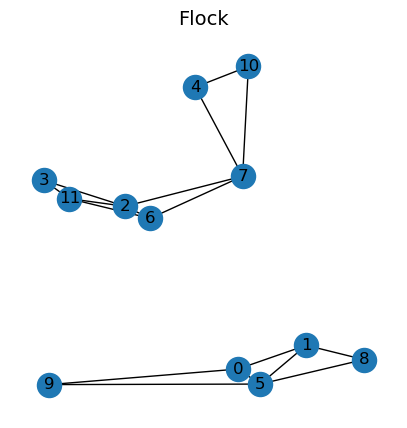

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title(f"Flock", fontsize=14)
G = array_to_graph(setups[3].init(),2)
nx.draw(G, with_labels = True, pos=nx.get_node_attributes(G, "pos"))
plt.show()

#### A quick overview:

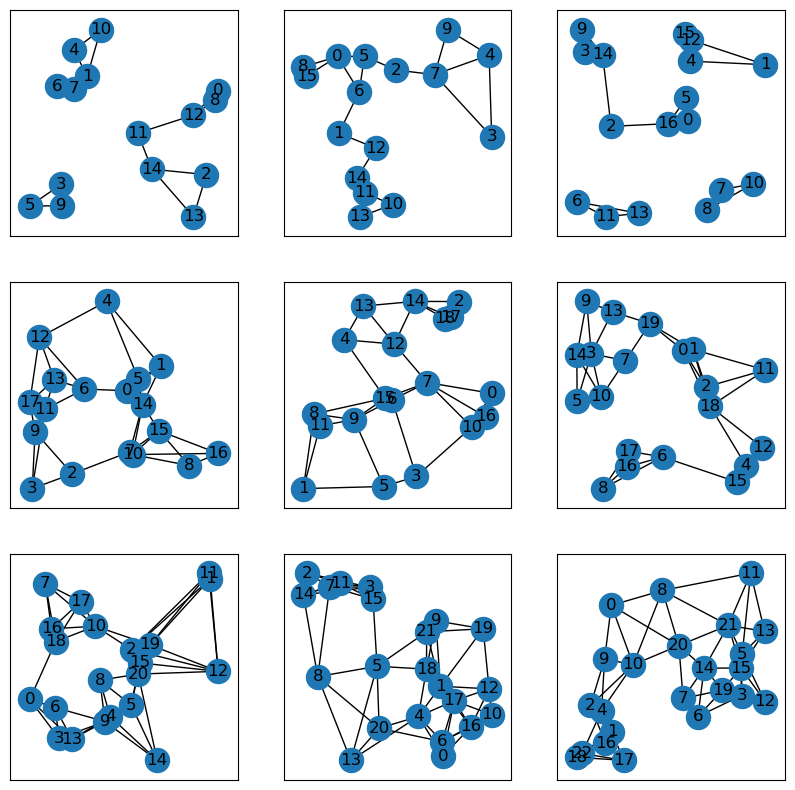

In [26]:
# n - rows, k - columns of plots
n, k = 3, 3

# Create your initial conditions here
ran_setups = [Setup(n=15+i, q=2+int(i/3), seed=1234+i) for i in range(n*k)]

fig, axes = plt.subplots(nrows=n, ncols=k, figsize=(10,10))

# make a list of axis, notice the [ ] at the end, this way we have the same type of result (a list)
ax = axes.flatten() if type(axes)==np.ndarray else [axes]

for i in range(n*k):
    G = array_to_graph(ran_setups[i].init(), ran_setups[i].q)
    nx.draw(G, with_labels = True, pos=nx.get_node_attributes(G, "pos"), ax=ax[i])
    ax[i].axis('on') 
plt.show()

### Exercise:
1) Create similar "viewer of initial conditions" but with Scatter plot and Line Collection, compare speed of drawing.
2) modify the example or your viewer in such a way that:
    a) node and edges representing closest neighbours from this nodes are the same colour
    b) nodes are of diffrent colors